In [1]:
cd ../src

/home/sankha/Documents/programs/ML/densityNN/src


Most of the section here is obtained from this website: http://abdulfatir.com/Normalizing-Flows-Part-1/

Given a mapping $f: R^d \Rightarrow R^d$ such that $\mathbf{y} = f(\mathbf{z})$, the PDF of $\mathbf{y} = q_1(\mathbf{y})$ may be obtained from the pdf of $\mathbf{z} = q_0(\mathbf{z})$ as:

\begin{align}
q_1(\mathbf{y}) &= q_0(\mathbf{z}) \Big| \det \frac { \partial f ^ {-1} } {\partial \mathbf{y}}  \Big|  \\
                &= q_0(\mathbf{z}) \Big| \det \frac { \partial f  } {\partial \mathbf{y}}  \Big| ^ {-1} \\
\end{align}

I should work out the equations at another time.

# Planar Flow

The planar flow results from the equation:

$$f(\mathbf{z}) = \mathbf{z} + \mathbf{u}h( \mathbf{w}^T\mathbf{z} + b ) $$

where $\mathbf{u}, \mathbf{w} \in R^n, b \in R$, and $h$ is a nonlinear function such as `tanh`. 

The Jacobian is given by:

$$ \frac { \partial f(\mathbf{z}) } { \partial \mathbf{z} } = \mathbf{I} + \mathbf{u}h'( \mathbf{w}^T\mathbf{z} + b )\mathbf{w}^T  $$

Using the matrix determinant Lemma,

$$ \det \frac { \partial f(\mathbf{z}) } { \partial \mathbf{z} } = 1 + \mathbf{u}h'( \mathbf{w}^T\mathbf{z} + b )\mathbf{w}^T\mathbf{u}  $$



We shall solve the following specific equation:

\begin{align}
q_0(\mathbf{z}) &= N(\mathbf{z} | \mathbf{0}, \mathbf{I} )   \\
\mathbf{w}     &= [5, 0]^T                                    \\
\mathbf{u}     &= [1, 0]^T                                    \\
b              &= 0                                          \\
h(\mathbf{x})  &= \tanh( \mathbf{x} )                   
\end{align}

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

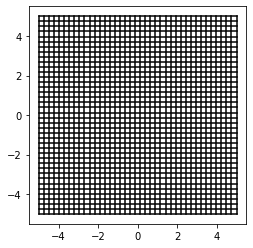

In [122]:
pos = np.linspace(-5, 5, 40)
x, y = [], []
for i, p in enumerate(pos):
    t = np.linspace(-5, 5, 100)
    x.append(t)
    y.append(np.ones( t.shape )*p)
    y.append(t)
    x.append(np.ones( t.shape )*p)
    
xs = np.array(x)
ys = np.array(y)

plt.figure()
_, ax=plt.subplots(1,1)
for x,y in zip(xs, ys):
    plt.plot(x, y, color='black')
ax.set_aspect('equal', 'box')
plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

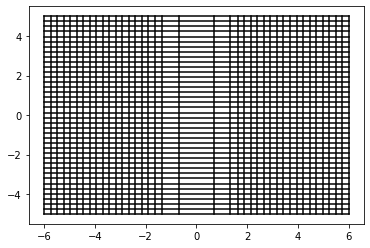

In [123]:
z = np.vstack((xs.flatten(), ys.flatten()))

w = np.array([5, 0]).reshape((-1, 1))
u = np.array([1, 0]).reshape((-1, 1))
b = 0

f = z + u @ np.tanh( w.T @ z + b )
fx = f[0].reshape( xs.shape )
fy = f[1].reshape( ys.shape )

plt.figure()
_, ax=plt.subplots(1,1)
for x,y in zip(fx, fy):
    plt.plot(x, y, color='black')
plt.show()
ax.set_aspect('equal', 'box')
plt.show()
plt.close()

In [83]:
x, y = np.linspace(-5, 5, 30), np.linspace(-5, 5, 30)
X, Y = np.meshgrid( x, y )
z = np.vstack((X.flatten(), Y.flatten()))
z.shape

w = np.array([5, 0]).reshape((-1, 1))
u = np.array([1, 0]).reshape((-1, 1))
b = 0

f = z + u @ np.tanh( w.T @ z + b )


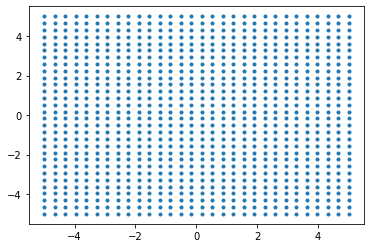

In [84]:
plt.plot( z[0], z[1], '.' )


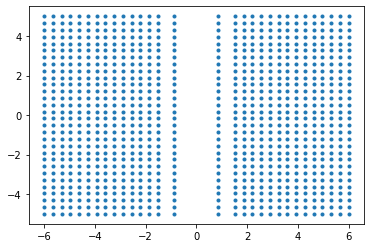

In [85]:
plt.plot( f[0], f[1], '.' )

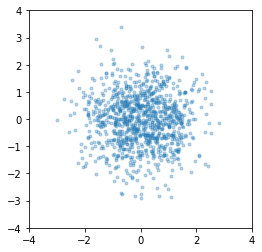

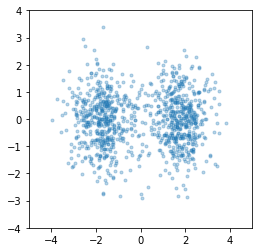

In [98]:
x, y = np.random.multivariate_normal(mean=(0, 0), cov=np.eye(2), size=1000).T
plt.figure(figsize=(4,4))
plt.plot(x, y, '.', alpha=0.3)
plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.show()
plt.close()

z = np.vstack((x, y))
f_comp = z + u @ np.tanh( w.T @ z + b )
plt.figure(figsize=(4,4))
plt.plot(f_comp[0], f_comp[1], '.', alpha=0.3)
plt.xlim((-5, 5))
plt.ylim((-4, 4))
plt.show()
plt.close()

In [96]:
from scipy.stats import kde
nbins=50
minVal, maxVal = -3, 3
x, y = np.random.multivariate_normal(mean=(0, 0), cov=np.eye(2), size=1000).T
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[minVal:maxVal:nbins*1j, minVal:maxVal:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

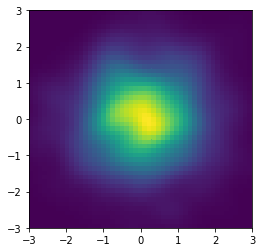

In [97]:
plt.figure(figsize=(4,4))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouard')
plt.xlim([minVal, maxVal])
plt.ylim([minVal, maxVal])
plt.show()
plt.close()

In [89]:
z = np.vstack((x, y))
z.shape

f_comp = z + u @ np.tanh( w.T @ z + b )

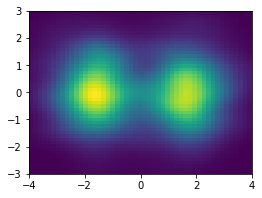

In [95]:
minValX, maxValX = -4, 4
minValY, maxValY = -3, 3
k = kde.gaussian_kde([f_comp[0], f_comp[1] ])
xi, yi = np.mgrid[minValX:maxValX:nbins*1j, minValY:maxValY:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.figure(figsize=(4,3))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouard')
plt.xlim([minValX, maxValX])
plt.ylim([minValY, maxValY])
plt.show()
plt.close()